In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

## 1. Data Preprocessing

###  • Load the Iris dataset


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define the column names for the dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset into a pandas DataFrame
iris_data = pd.read_csv(url, names=column_names)

 ### • Data exploration & cleaning

In [3]:
iris_data.sample(3)


,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
13,4.3,3.0,1.1,0.1,Iris-setosa


In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Convert the column `species` to "category" type

In [6]:
iris_data['species'] = iris_data['species'].astype('category')

#### Check missing values

In [7]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###  • Data visualization

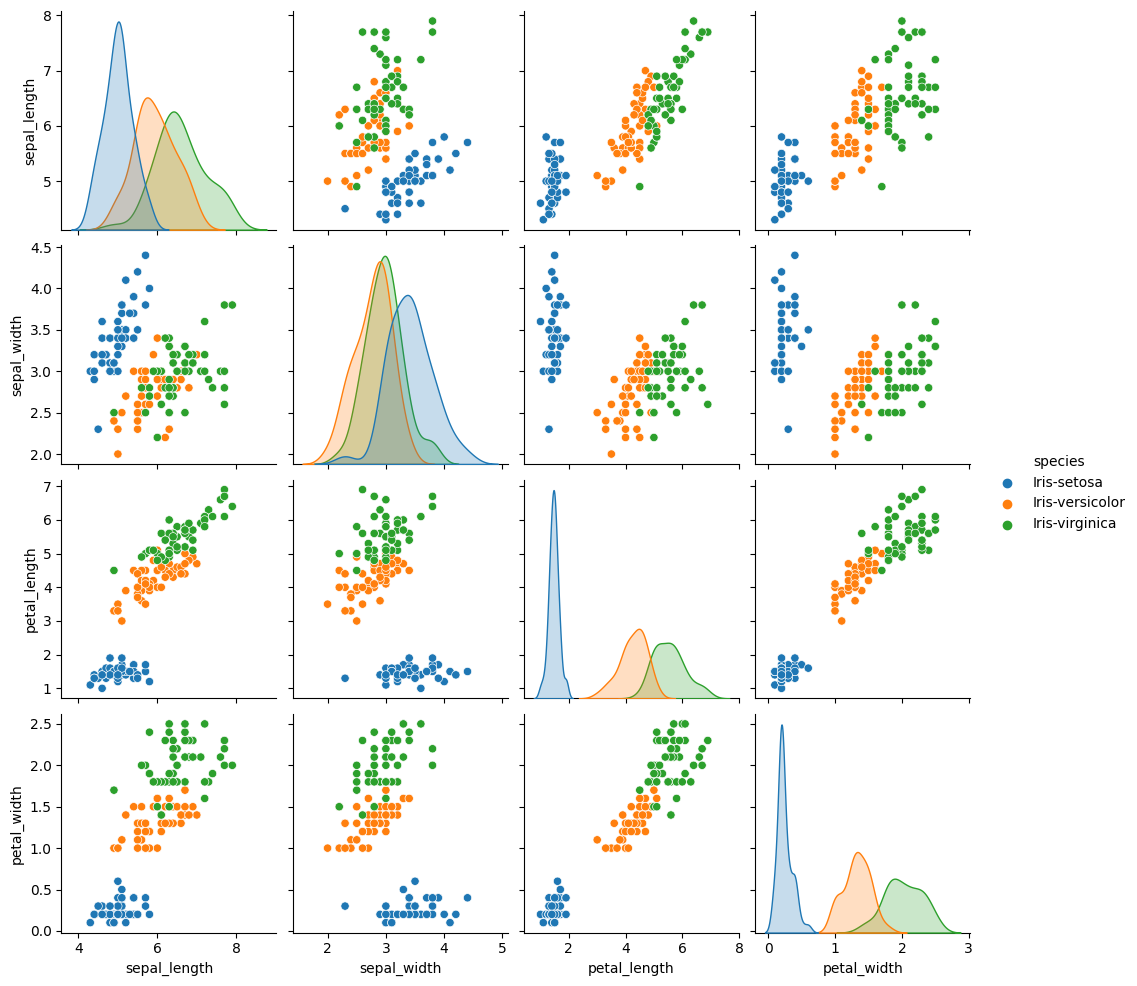

In [8]:
sns.pairplot(iris_data, hue='species')
plt.show()


### • Split the dataset into features and target variables

In [9]:
# Split the dataset into features (X) and target variable (y)
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
print("Train set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTest set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Train set shapes:
X_train: (120, 4)
y_train: (120,)

Test set shapes:
X_test: (30, 4)
y_test: (30,)


## 2. Unsupervised Learning: Clustering & Outlier Detection 

### • Apply K-means clustering algorithm to cluster the data

In [11]:
# Initializing KMeans model with THREE number of clusters 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(X_train)

# Predict cluster labels for the training data
train_cluster_labels = kmeans.predict(X_train)

###  • Visualize the clusters

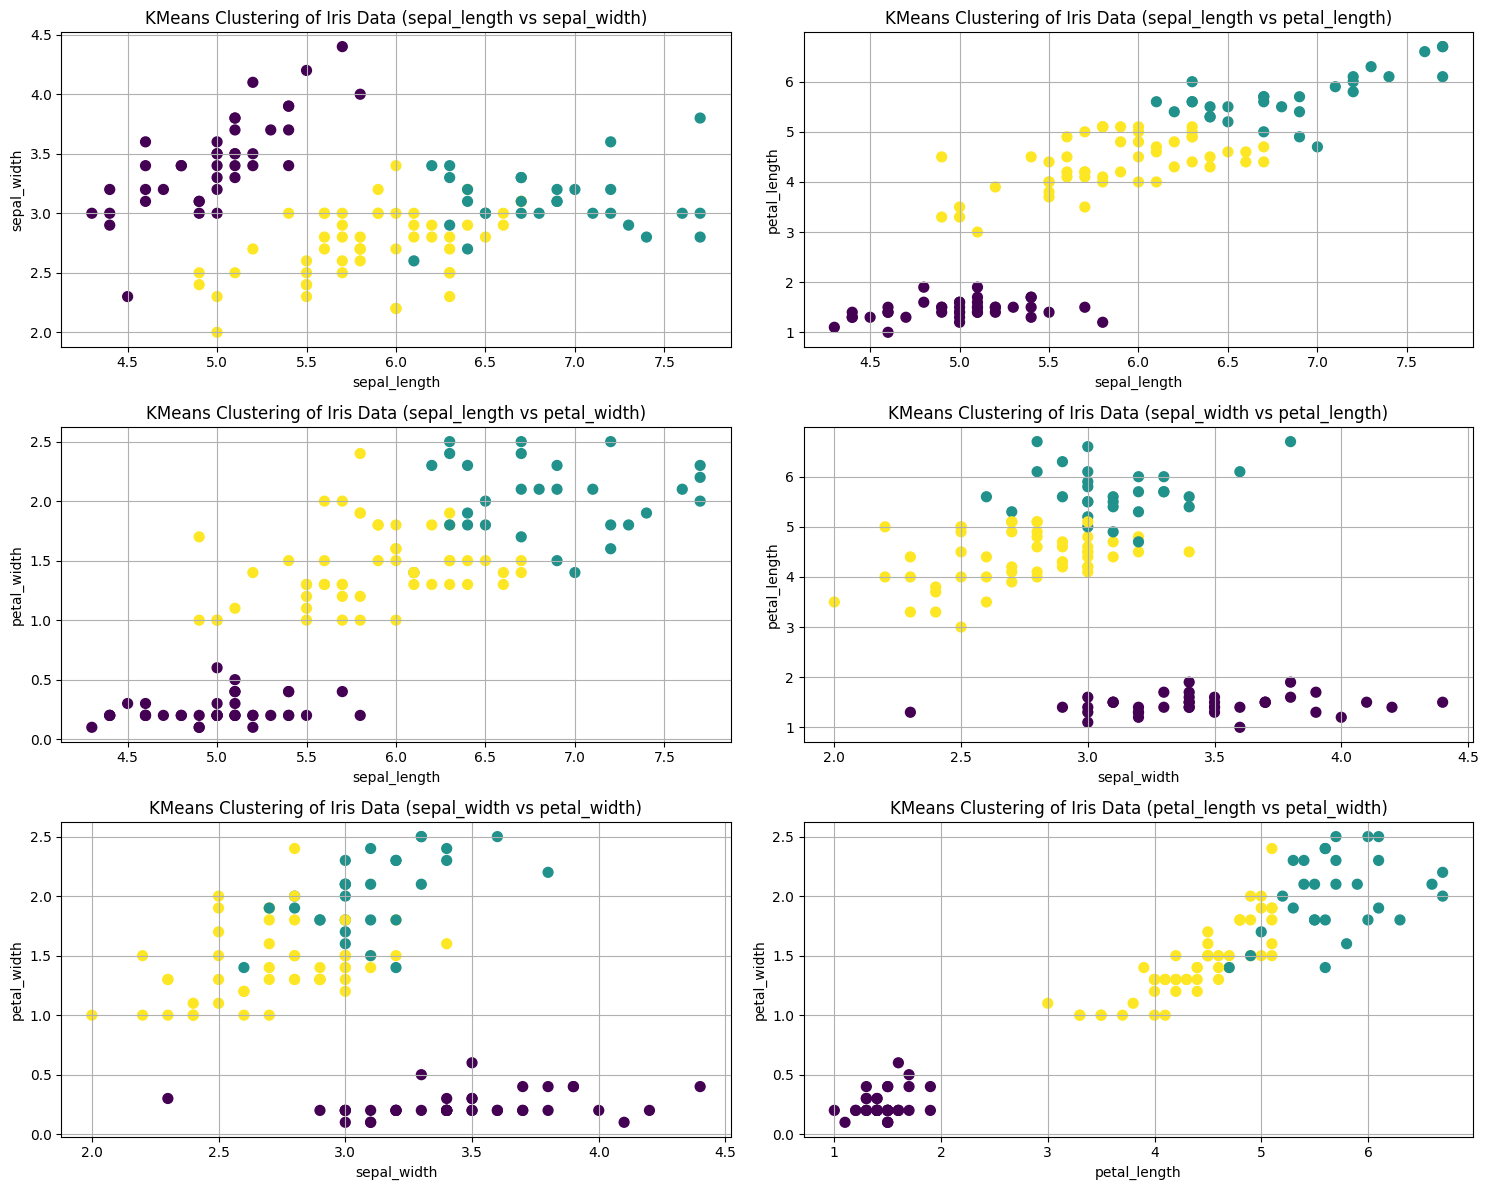

In [12]:
import itertools

# Get all possible combinations of feature pairs
feature_pairs = list(itertools.combinations(X_train.columns, 2))

# Plot each pair of features
plt.figure(figsize=(15, 12))
for i, (feature1, feature2) in enumerate(feature_pairs, 1):
    plt.subplot(3, 2, i)
    plt.scatter(X_train[feature1], X_train[feature2], c=train_cluster_labels, cmap='viridis', s=50)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'KMeans Clustering of Iris Data ({feature1} vs {feature2})')
    plt.grid(True)

plt.tight_layout()
plt.show()

###  • Detect outliers using appropriate techniques such as isolation forest or DBSCAN.

###  • Evaluate the clustering results

## 3. Supervised Learning: Baseline Model